# Case Study - Leads Scoring

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


### Reading and understanding Dataset

In [2]:
# reading
leads_scoring_df = pd.read_csv(r"C:\\Users\\rinsh\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
leads_scoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# info()
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# decribe
leads_scoring_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# shape
leads_scoring_df.shape

(9240, 37)

### Data cleaning

In [6]:
# few columns showing 'Select'. These values are as good as missing values and hence it will convert 'Select' values to Nan
# Replacing 'Select' values with Nan
leads_scoring_df=leads_scoring_df.replace("Select", np.nan)

In [7]:
# checking for missing values
leads_scoring_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# checking missing value percentages
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df)),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping

In [9]:
# dropping columns having missing value percentages greater than or equal to 35%
columns_missing=leads_scoring_df.columns

for i in columns_missing:
    if((100*(leads_scoring_df[i].isnull().sum()/len(leads_scoring_df.index))) >=35):
        leads_scoring_df.drop(i, axis=1,inplace = True)

In [10]:
# dropping Prospect ID and Lead Number bcs they are irrelevant informations or variables for data analysis.
leads_scoring_df.drop(['Prospect ID','Lead Number'],axis= 1, inplace = True)
# Dropping unique valued columns
leads_scoring_df= leads_scoring_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# rechecking the missing value percentage after dropping
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

#### Imputing

In [12]:
# Next considering the more than 20% of missing value columns:"Country"(26.63),"What is your current occupation"( 29.11),"What matters most to you in choosing a course"(29.32)
#country column with 26.63% missing value
# checking the total count of country column with missing values
leads_scoring_df.Country.isnull().sum()


2461

In [13]:
# checking valuecounts
leads_scoring_df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [14]:
# There is one unknown category so the missing values filling with "unknown"
leads_scoring_df['Country'].fillna(value="unknown", inplace=True)

In [15]:
# Again checking  the missing values of country column
leads_scoring_df.Country.isnull().sum()

0

In [16]:
# "Whatis your current occupation"( 29.11)
# checking the total count of missing values
leads_scoring_df["What is your current occupation"].isnull().sum()


2690

In [17]:
# value counts
leads_scoring_df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [18]:
# most common value is "unemployed"
#filling missing value with this most common value using mode()
leads_scoring_df['What is your current occupation']=leads_scoring_df['What is your current occupation'].fillna(leads_scoring_df['What is your current occupation'].mode()[0])


In [19]:
#Again checking  the missing values of "What is your current occupation" column
leads_scoring_df["What is your current occupation"].isnull().sum()

0

In [20]:
#"What matters most to you in choosing a course"(29.32)
# checking the total count of missing values
leads_scoring_df["What matters most to you in choosing a course"].isnull().sum()

2709

In [21]:
# valuecounts
leads_scoring_df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [22]:
# most common value is "Better Career Prospects"
# imputing the missing value with the most common value using mode()
leads_scoring_df['What matters most to you in choosing a course']=leads_scoring_df['What matters most to you in choosing a course'].fillna(leads_scoring_df['What matters most to you in choosing a course'].mode()[0])

In [23]:
#Again checking  the missing values of "What matters most to you in choosing a course" column
leads_scoring_df["What matters most to you in choosing a course"].isnull().sum()

0

In [24]:
# rechecking the missing value percentage after imputing with most common value using mode()
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [25]:
#Checking shape of the df
leads_scoring_df.shape

(9240, 20)

In [26]:
#We can drop the rows with remaining missing data
leads_scoring_df = leads_scoring_df.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'])

In [27]:
#Checking Shape of the data frame
leads_scoring_df.shape

(9074, 20)

In [28]:
# Checking for any null values
leads_scoring_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
Last Notable Activity          

In [29]:
# Now we have a dataset with no missing values.

### Exploratory Data Analysis

#### Univariate Analysis

##### Categorical Variables

In [30]:
# finding categorical varibles from datatype=object
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

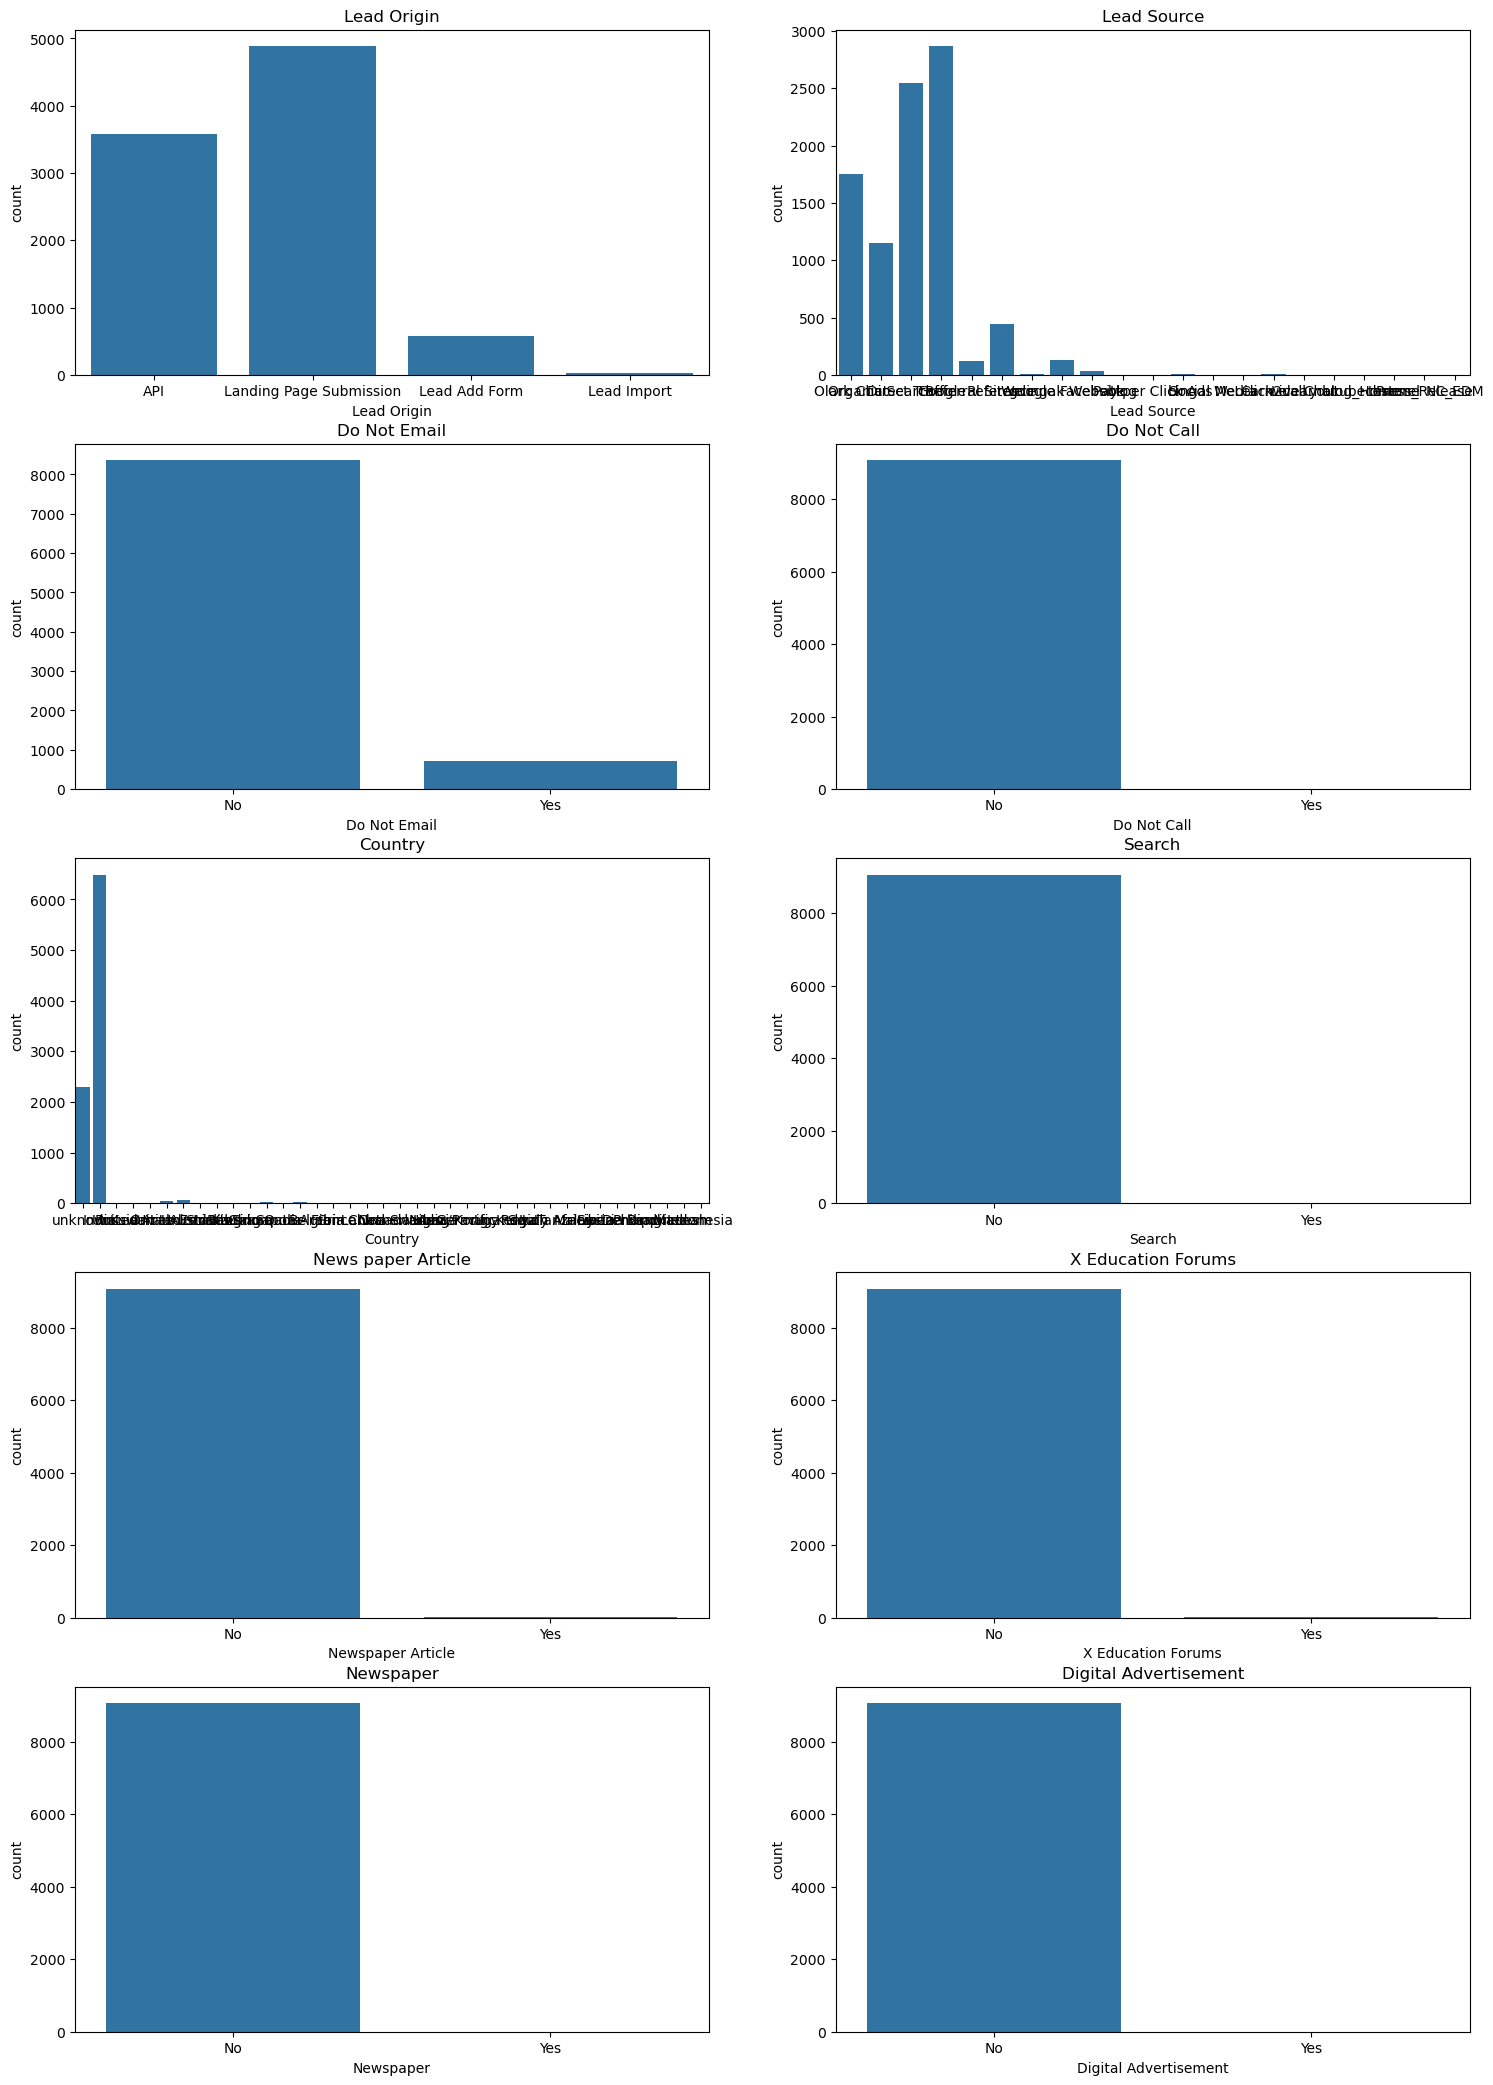

In [31]:
# visualising categorical variables using count plot 
plt.figure(figsize = (18,26))

plt.subplot(5,2,1)
sns.countplot(x='Lead Origin',data=leads_scoring_df)
plt.title('Lead Origin')

plt.subplot(5,2,2)
sns.countplot(x='Lead Source',data=leads_scoring_df)
plt.title('Lead Source')

plt.subplot(5,2,3)
sns.countplot(x='Do Not Email',data=leads_scoring_df)
plt.title('Do Not Email')

plt.subplot(5,2,4)
sns.countplot(x='Do Not Call',data=leads_scoring_df)
plt.title('Do Not Call')

plt.subplot(5,2,5)
sns.countplot(x='Country',data=leads_scoring_df)
plt.title('Country')

plt.subplot(5,2,6)
sns.countplot(x='Search',data=leads_scoring_df)
plt.title('Search')

plt.subplot(5,2,7)
sns.countplot(x='Newspaper Article',data=leads_scoring_df)
plt.title('News paper Article')

plt.subplot(5,2,8)
sns.countplot(x='X Education Forums',data=leads_scoring_df)
plt.title('X Education Forums')

plt.subplot(5,2,9)
sns.countplot(x='Newspaper',data=leads_scoring_df)
plt.title('Newspaper')

plt.subplot(5,2,10)
sns.countplot(x='Digital Advertisement',data=leads_scoring_df)
plt.title('Digital Advertisement')
plt.show()

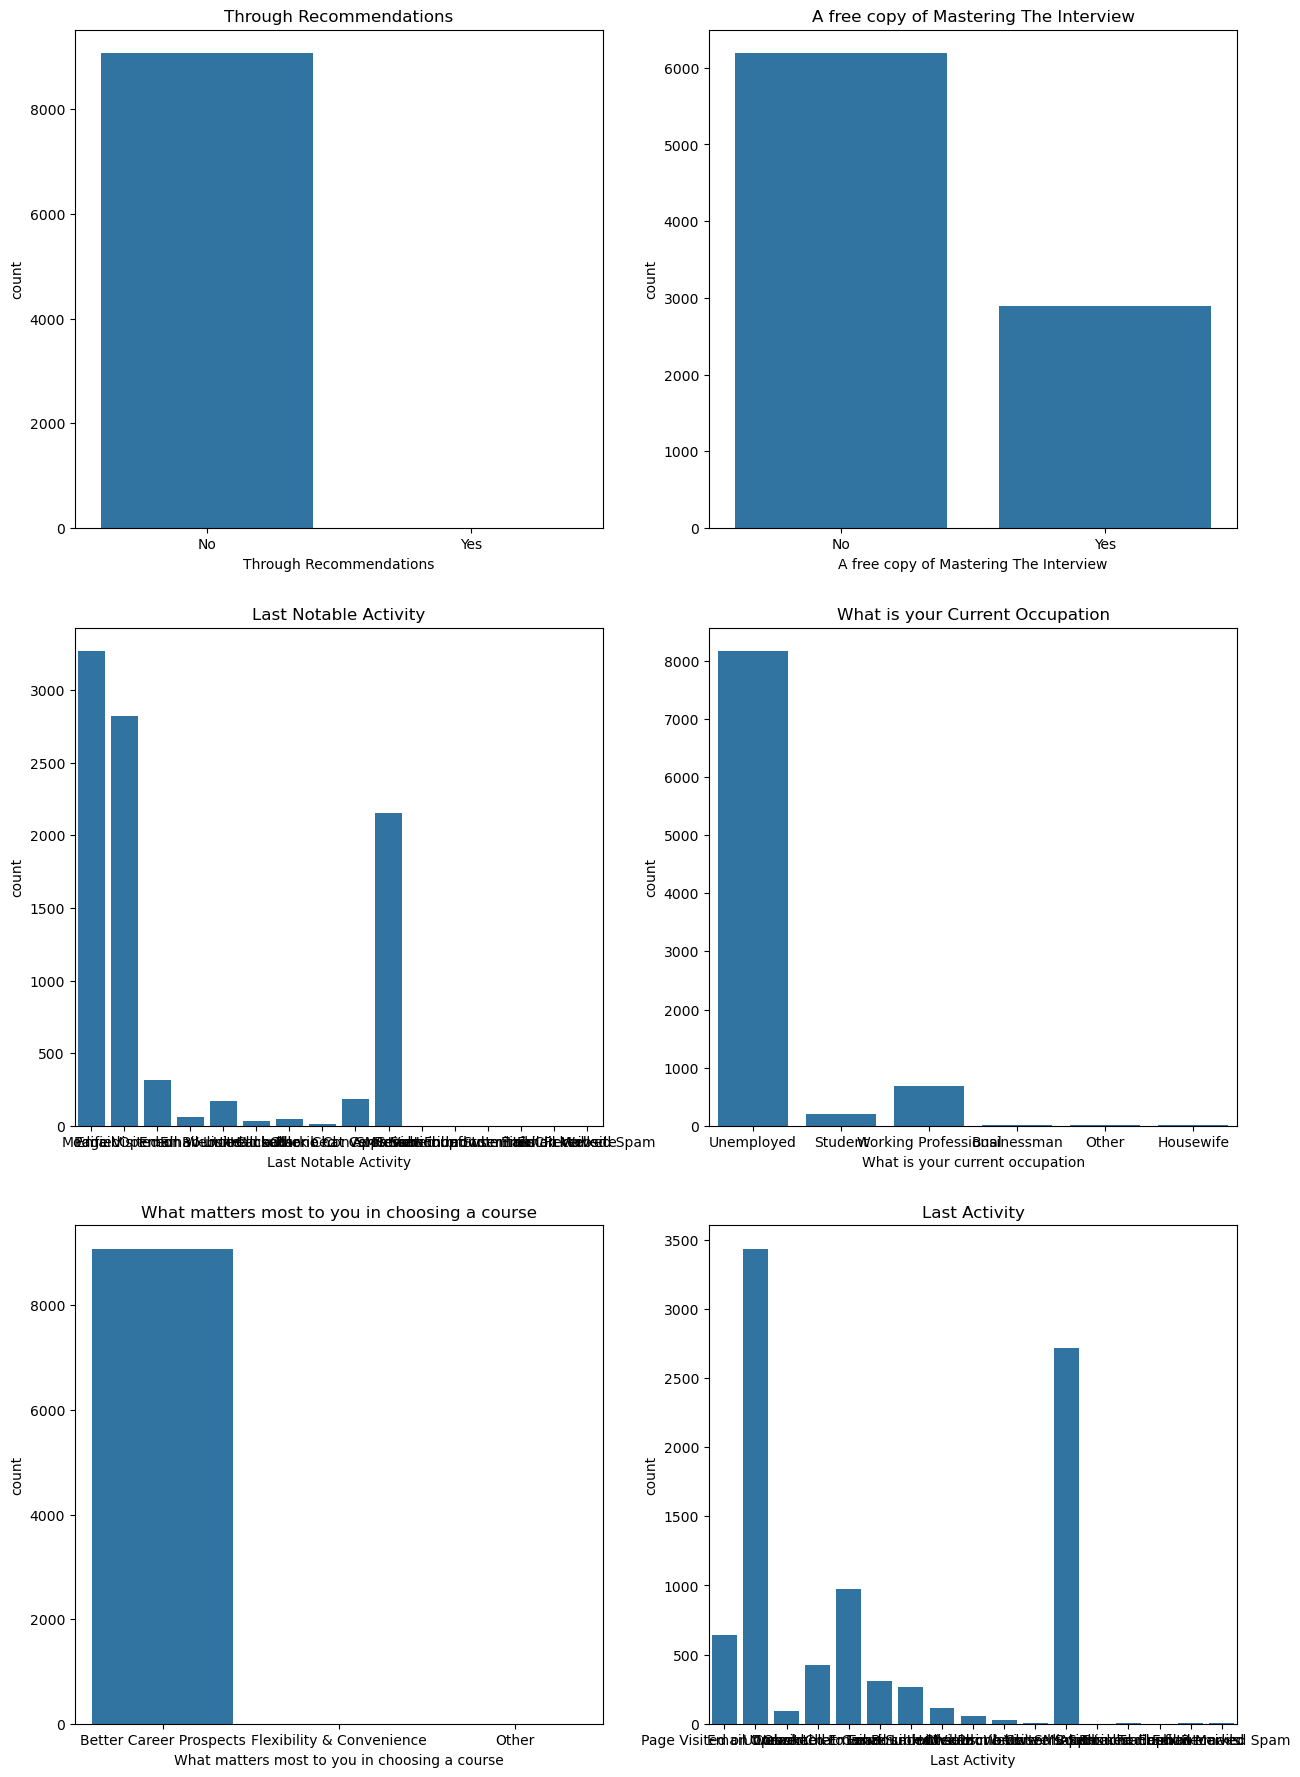

In [32]:
plt.figure(figsize = (15,22))

plt.subplot(3,2,1)
sns.countplot(x='Through Recommendations',data=leads_scoring_df)
plt.title('Through Recommendations')

plt.subplot(3,2,2)
sns.countplot(x='A free copy of Mastering The Interview',data=leads_scoring_df)
plt.title('A free copy of Mastering The Interview')

plt.subplot(3,2,3)
sns.countplot(x='Last Notable Activity',data=leads_scoring_df)
plt.title('Last Notable Activity')


plt.subplot(3,2,4)
sns.countplot(x='What is your current occupation',data=leads_scoring_df)
plt.title('What is your Current Occupation')
plt.subplot(3,2,5)
sns.countplot(x='What matters most to you in choosing a course',data=leads_scoring_df)
plt.title('What matters most to you in choosing a course')
plt.subplot(3,2,6)
sns.countplot(x='Last Activity',data=leads_scoring_df)
plt.title('Last Activity')
plt.show()

In [33]:
## insights:


##### Numerical Variables

In [34]:
# finding numercal varibles from info() using datatype=int/float
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

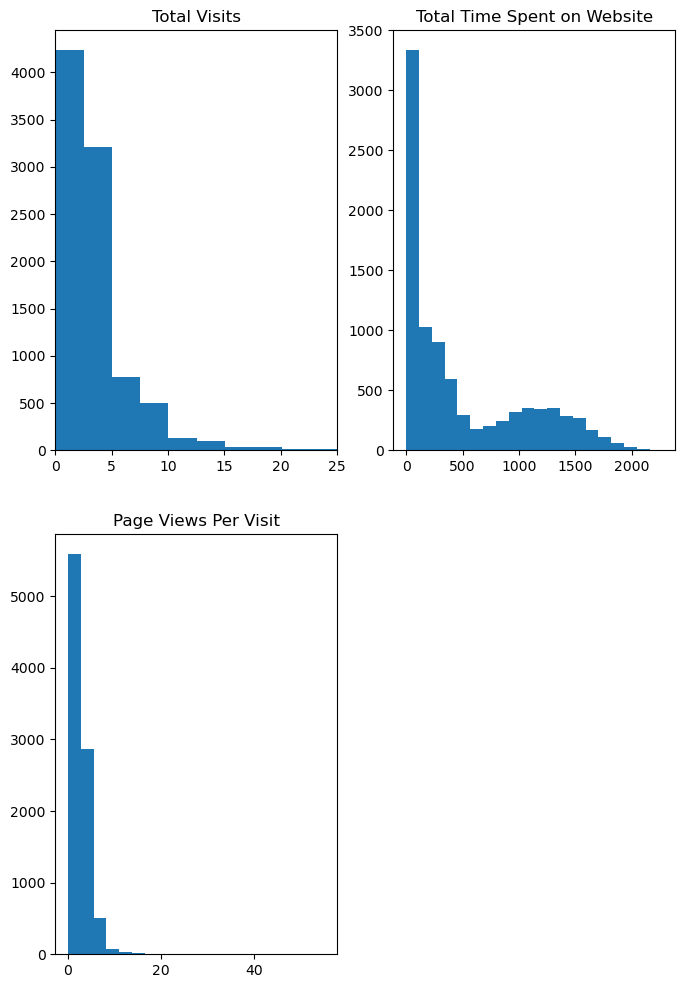

In [35]:
# visualising numerical varibles using histogram plot

plt.figure(figsize = (8,12))
plt.subplot(2,2,1)
plt.hist(leads_scoring_df['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads_scoring_df['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads_scoring_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')


plt.show()


#### Target variable

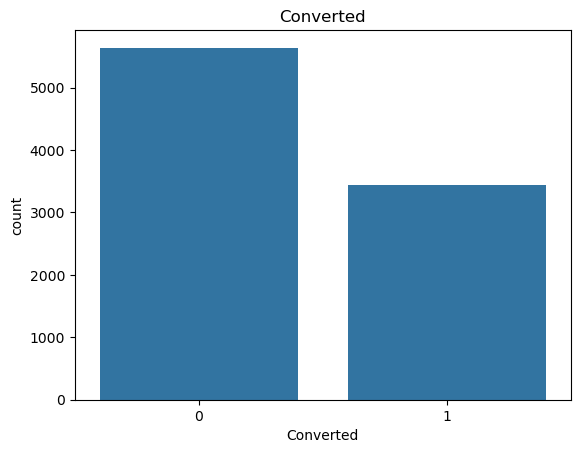

In [36]:
# converted column: which is the target variable(The target variable. Indicates whether a lead has been successfully converted or not)
# visualising converted column using countplot
sns.countplot(x='Converted',data=leads_scoring_df)
plt.title('Converted')
plt.show()


In [37]:
# Insight:Around 5600 people  haven't join any course whereas more than 3000 people have got converted to leads by joining any course from X education.

#### Bivariate Analysis

##### Categorical_Target Variable Analysis

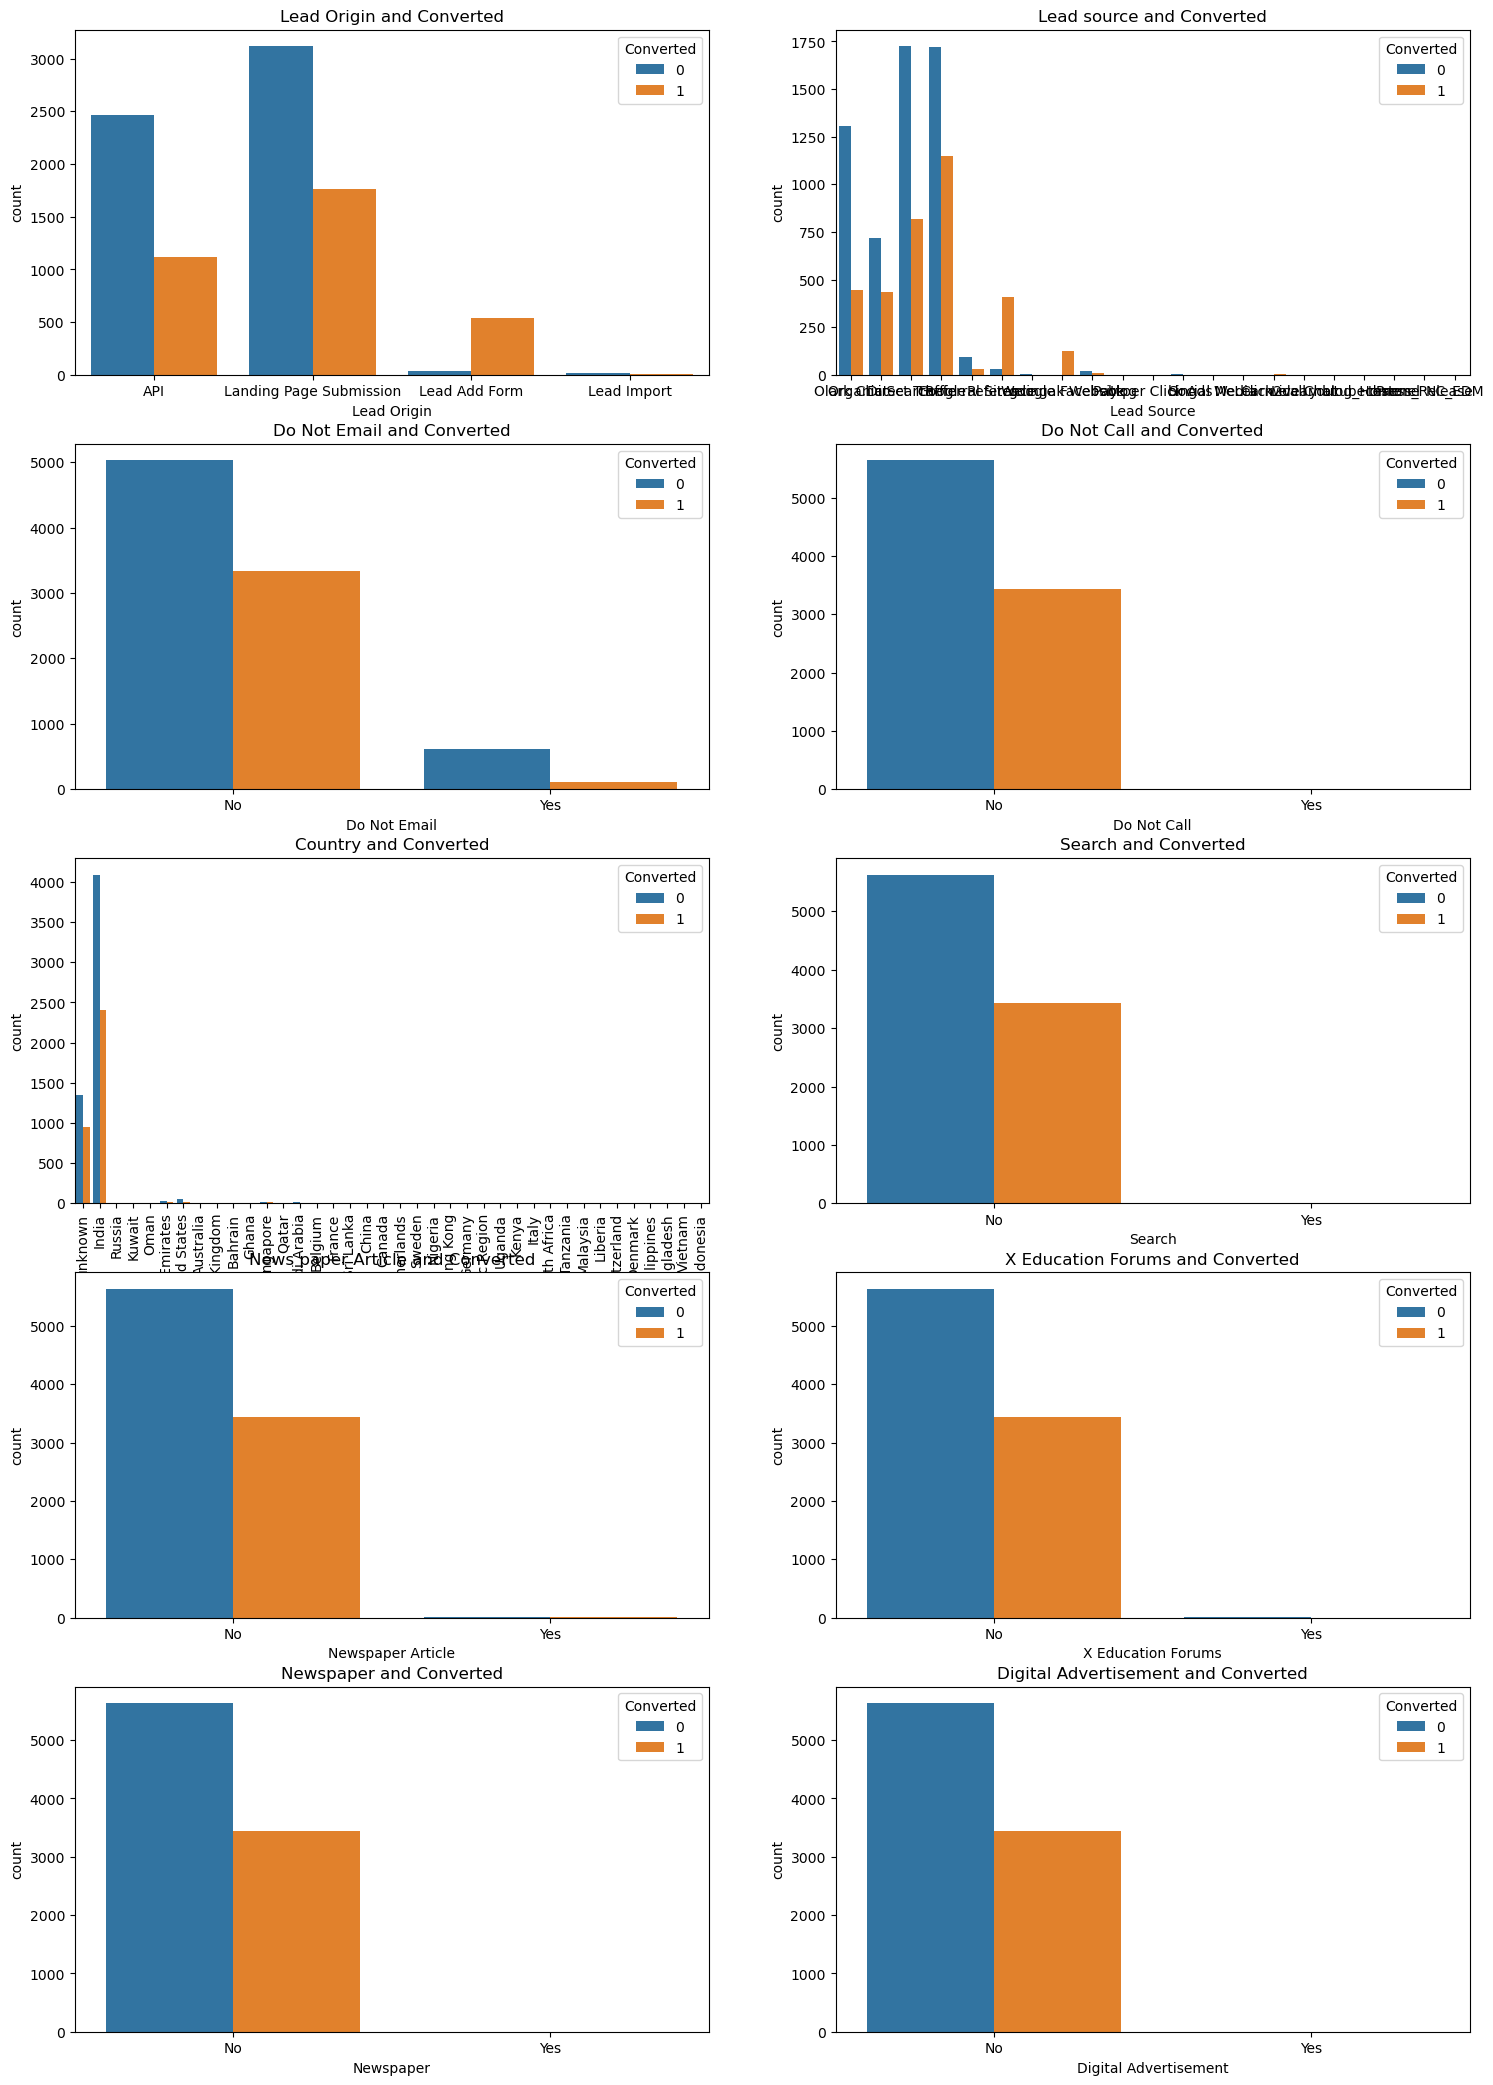

In [38]:
# visualising the relationship between categorical variables and target variable " converted" using count plot
plt.figure(figsize = (18,26))

plt.subplot(5,2,1)
sns.countplot(x='Lead Origin', hue= 'Converted',data=leads_scoring_df)
plt.title('Lead Origin and Converted')

plt.subplot(5,2,2)
sns.countplot(x='Lead Source',hue= 'Converted',data=leads_scoring_df)
plt.title('Lead source and Converted')

plt.subplot(5,2,3)
sns.countplot(x='Do Not Email',hue= 'Converted',data=leads_scoring_df)
plt.title('Do Not Email and Converted')

plt.subplot(5,2,4)
sns.countplot(x='Do Not Call',hue= 'Converted',data=leads_scoring_df)
plt.title('Do Not Call and Converted')

plt.subplot(5,2,5)
sns.countplot(x='Country',hue= 'Converted',data=leads_scoring_df).tick_params(axis='x', rotation = 90)
plt.title('Country and Converted')

plt.subplot(5,2,6)
sns.countplot(x='Search',hue= 'Converted',data=leads_scoring_df)
plt.title('Search and Converted')

plt.subplot(5,2,7)
sns.countplot(x='Newspaper Article',hue= 'Converted',data=leads_scoring_df)
plt.title('News paper Article and Converted')

plt.subplot(5,2,8)
sns.countplot(x='X Education Forums',hue= 'Converted',data=leads_scoring_df)
plt.title('X Education Forums and Converted')

plt.subplot(5,2,9)
sns.countplot(x='Newspaper',hue= 'Converted',data=leads_scoring_df)
plt.title('Newspaper and Converted')

plt.subplot(5,2,10)
sns.countplot(x='Digital Advertisement',hue= 'Converted',data=leads_scoring_df)
plt.title('Digital Advertisement and Converted')

plt.show()

In [39]:
#Insights:
#  In lead origin Landing Page Submission has highest count of people who did'nt convert but at the same time a good count of people had converted.
# In lead origin Lead Added form total count less but in that count most of the people converted .
# From Lead source countplot we can see that most converting people are from Google
# do not email and do not call  people are showing   highest conversion count .
# In cities India has highest conversion count.
# In search analysing People who didn't search about the courses are mostly converted.
#= good conversion rate for People who haven't seen ads on Newspaper Articles , X Education Forum , Newspaper and Digital Advertisement .

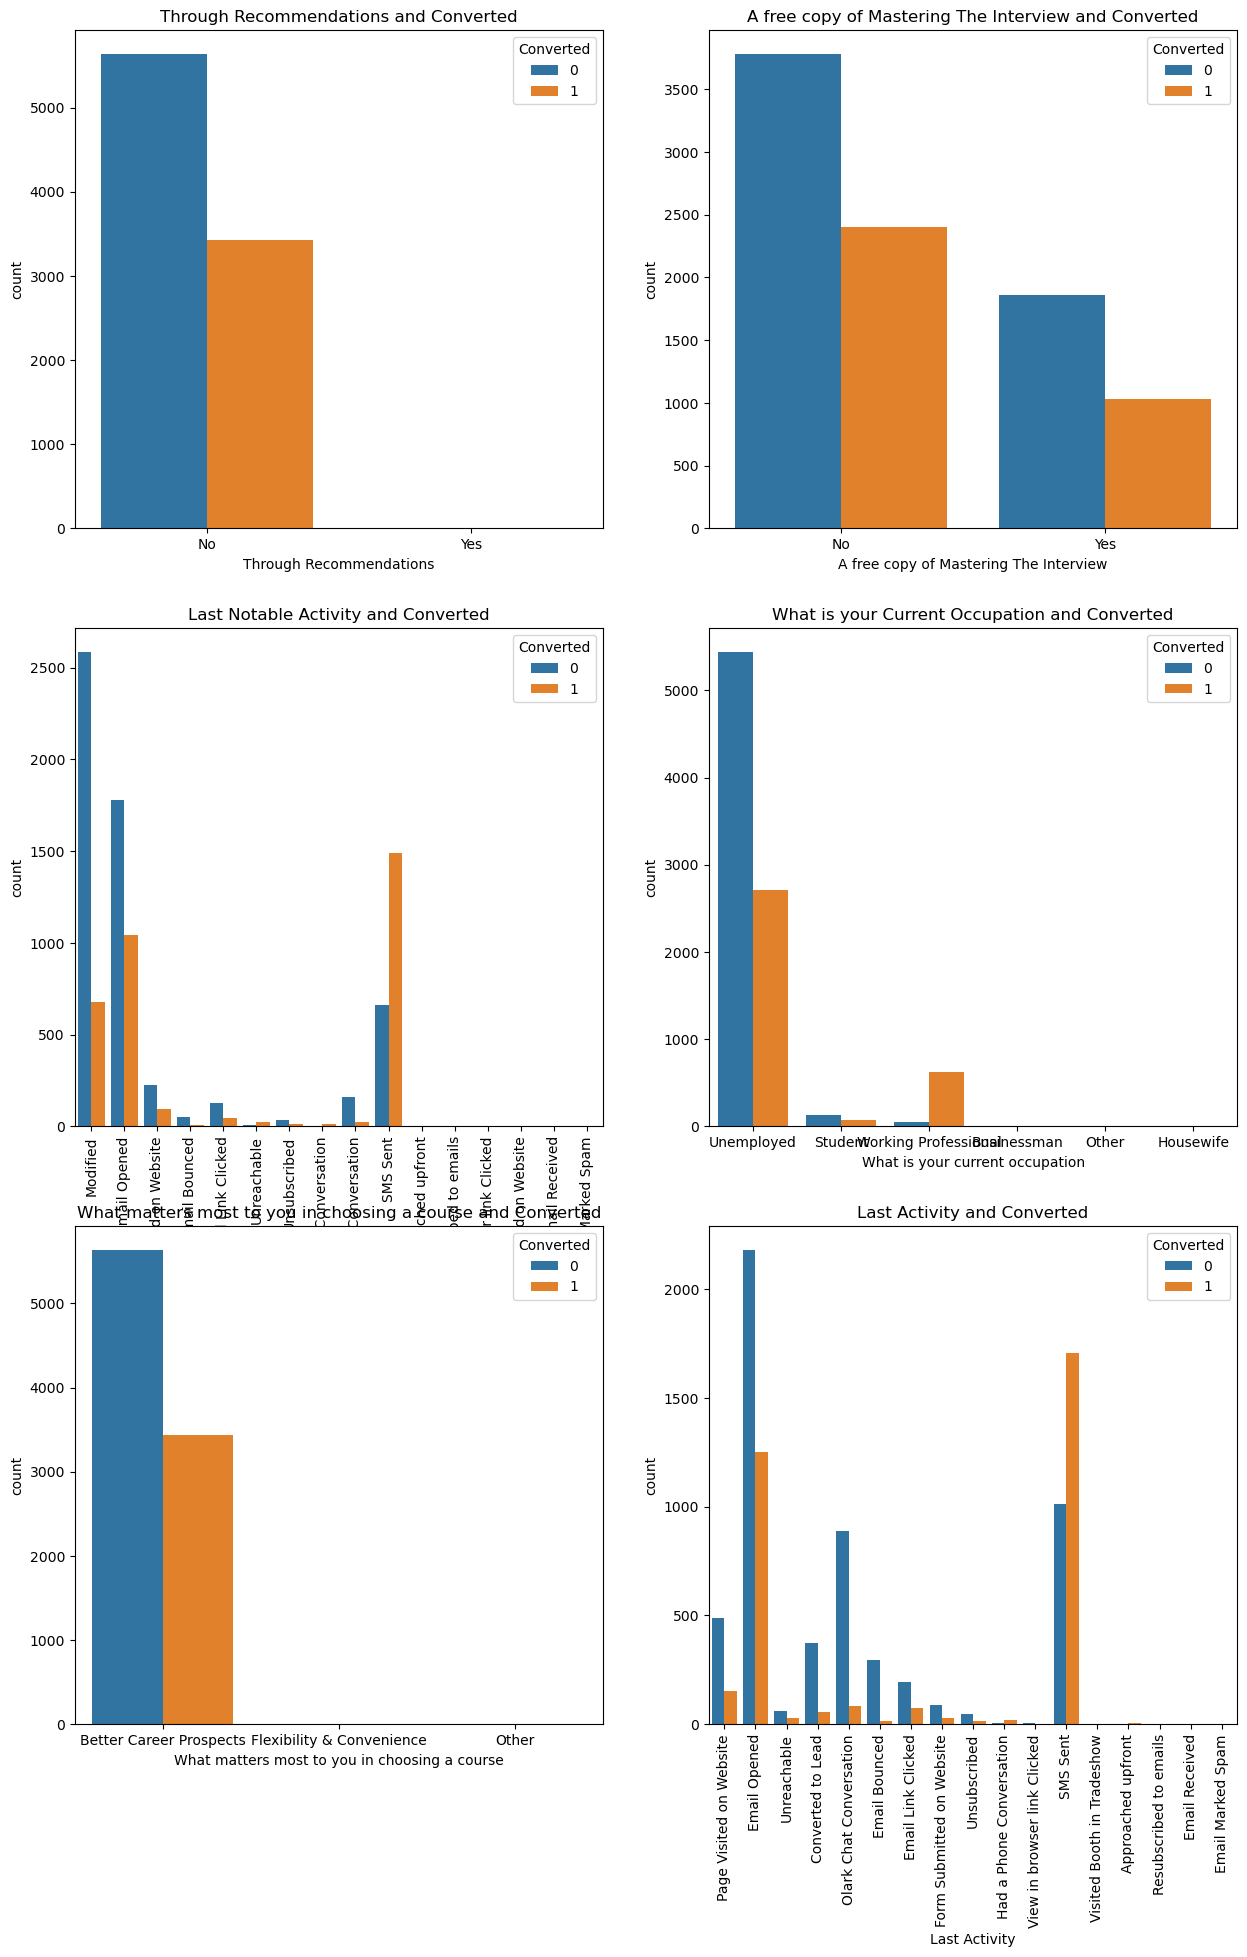

In [40]:
plt.figure(figsize = (15,22))

plt.subplot(3,2,1)
sns.countplot(x='Through Recommendations',hue= 'Converted',data=leads_scoring_df)
plt.title('Through Recommendations and Converted')

plt.subplot(3,2,2)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=leads_scoring_df)
plt.title('A free copy of Mastering The Interview and Converted')

plt.subplot(3,2,3)
sns.countplot(x='Last Notable Activity',hue='Converted',data=leads_scoring_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity and Converted')


plt.subplot(3,2,4)
sns.countplot(x='What is your current occupation',hue='Converted',data=leads_scoring_df)
plt.title('What is your Current Occupation and Converted')

plt.subplot(3,2,5)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=leads_scoring_df)
plt.title('What matters most to you in choosing a course and Converted')
            
plt.subplot(3,2,6)
sns.countplot(x='Last Activity',hue='Converted',data=leads_scoring_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity and Converted')
plt.show()

In [41]:
#Insights:
# A good conversion rate for the customer didn't came in through recommendations.
#  The customer didn't want a free copy of 'Mastering the Interview' has the highest count of conversion also the customer wants the copy showing a conversion  but in less count rate.
# In  last notable acitivity performed by the student ,Sms Sent have highest conversion count  and modified is the highest not converted category.
# In current occupation ,Working profession shows highest count of conversion also unemployed people have higher rate of conversion.
# what is their main motto behind doing this course is Better Career Prospects shows highest conversion.
# In Last activity performed by the customer, Sms Sent have highest conversion count also email opened have a good conversion rate.



### Data Preparation

##### Preparing data for modelling:

##### Dummy variables

In [42]:
var_list=leads_scoring_df.loc[:, leads_scoring_df.dtypes == 'object'].columns
var_list

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
# creating dummy vars and dropping a redundant dummy vars
dummy = pd.get_dummies(leads_scoring_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True).astype(int)
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
# concat the dummy with the original one
pd.set_option("display.max_columns",500)
leads_scoring_df_new = pd.concat([leads_scoring_df, dummy], axis=1)
leads_scoring_df_new

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Em

In [45]:
# dropping unnecessary categorical variable columns
leads_scoring_df_new =leads_scoring_df_new.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
leads_scoring_df_new

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [46]:
# checking dataset size
leads_scoring_df_new.shape

(9074, 111)

#### Test-Train Split

In [47]:
# Importing library
import sklearn
from sklearn.model_selection import train_test_split

In [48]:
# Putting feature variable to X
X = leads_scoring_df_new.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [49]:
# Putting Response variable to Y
y = leads_scoring_df_new['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

####  Feature Scaling

In [51]:
# Importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [52]:
# instantiate an object
scaler=MinMaxScaler()
# scaling  numeric variables  'TotalVisits','Page Views Per Visit', 'Total Time Spent on Website'
# Fit on data
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

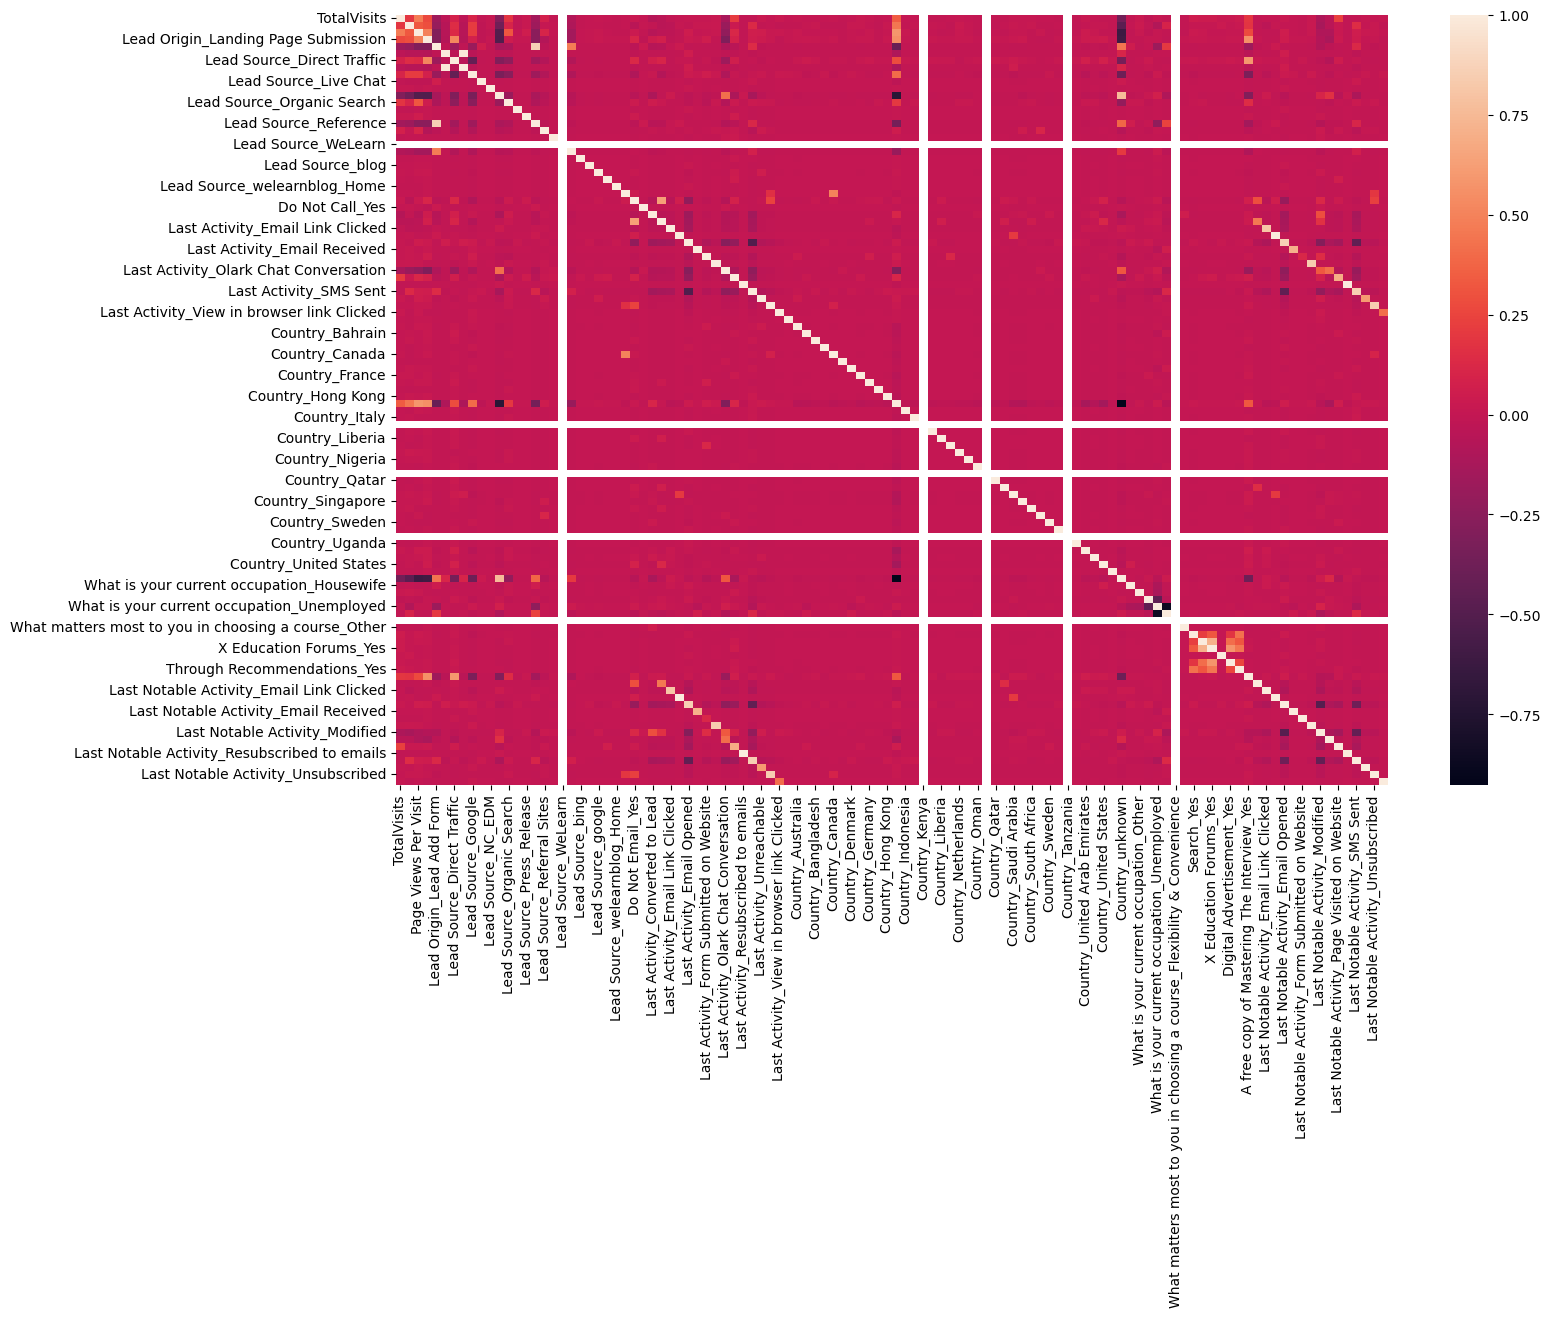

In [53]:
# checking the correlation among varibles
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr())
plt.show()

In [54]:
# it is difficult to  analyse and drop variables due to lot of variables.

In [55]:
X_train.isnull().sum()

TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_Landing Page Submission                   0
Lead Origin_Lead Add Form                             0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 110, dtype: int64

#### Building the model

In [56]:
#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [57]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [58]:
# Importing the 'RFE' and selecting 15 variables

rfe = RFE(estimator=logreg, n_features_to_select=15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [59]:
# Taking a look at the features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 57),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 36),
 ('Lead Source_Facebook', False, 76),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Live Chat', False, 61),
 ('Lead Source_NC_EDM', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Pay per Click Ads', False, 65),
 ('Lead Source_Press_Release', False, 67),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 96),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 84),
 ('Lead Source_blog', False, 46),
 ('Lead Source_google', False, 15),
 ('Lead Source_testone', False, 62),
 ('Lead Source_welearnblog_Home', False, 55),
 (

In [60]:
#Adding all the columns selected by RFE to the variable 'Col'
Col = X_train.columns[rfe.support_]

In [61]:
# Selecting only columns selected by RFE
X_train = X_train[Col]

### Creating Model 1

In [62]:
# Fitting a logistic Regression model on X_train after adding a constant and getting the summary as Output

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.7
Date:                Wed, 16 Oct 2024   Deviance:                       5321.4
Time:                        01:14:49   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9530      0.091    -10.529      0.000      -1.130      -0.776
TotalVisits                                              7.9465      2.191      3.627      0.000       3.653      12.240
Total Time Spent on Website                              4.6732      0.166     28.134      0.000       4.348       4.999
Lead Origin_Lead Add Form                                4.1786      0.227     18.406      0.000       3.734       4.624
Lead Origin_Lead Import                                  1.7328      0.463      3.741      0.000       0.825       2.641
Lead Source_Olark Chat                                   1.2244      0.107     11.446      0.000       1.015       1.434
Lead Source_Welingak Website                             2.1399      0.762      2.810      0.005       0.647       3.632
Do Not Email_Yes                                        -1.8612      0.179    -10.380      0.000      -2.213      -1.510
Last Activity_Had a Phone Conversation                   2.0350      0.811      2.509      0.012       0.445       3.625
What is your current occupation_Housewife               22.8523   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Working Professional     2.7435      0.188     14.621      0.000       2.376       3.111
Last Notable Activity_Email Link Clicked                -1.8797      0.257     -7.300      0.000      -2.384      -1.375
Last Notable Activity_Email Opened                      -1.4176      0.089    -16.015      0.000      -1.591      -1.244
Last Notable Activity_Modified                          -2.1175      0.092    -22.968      0.000      -2.298      -1.937
Last Notable Activity_Olark Chat Conversation           -2.8017      0.328     -8.549      0.000      -3.444      -2.159
Last Notable Activity_Page Visited on Website           -1.8913      0.212     -8.923      0.000      -2.307      -1.476
========================================================================================================================
"""

In [63]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
12,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.49
11,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,Lead Source_Welingak Website,1.33
9,What is your current occupation_Working Profes...,1.17
14,Last Notable Activity_Page Visited on Website,1.15
6,Do Not Email_Yes,1.10


In [64]:
#Dropping column'What is your current occupation_Housewife' as it has high p value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Creating Model 2

In [65]:
# Fitting a logistic Regression model on X_train after adding a constant and getting the summary as Output

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.3
Date:                Wed, 16 Oct 2024   Deviance:                       5330.6
Time:                        01:14:49   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9512      0.090    -10.517      0.000      -1.128      -0.774
TotalVisits                                              7.8903      2.186      3.609      0.000       3.606      12.175
Total Time Spent on Website                              4.6715      0.166     28.156      0.000       4.346       4.997
Lead Origin_Lead Add Form                                4.1987      0.227     18.524      0.000       3.754       4.643
Lead Origin_Lead Import                                  1.7255      0.463      3.725      0.000       0.818       2.633
Lead Source_Olark Chat                                   1.2197      0.107     11.412      0.000       1.010       1.429
Lead Source_Welingak Website                             2.1157      0.761      2.778      0.005       0.623       3.608
Do Not Email_Yes                                        -1.8618      0.179    -10.382      0.000      -2.213      -1.510
Last Activity_Had a Phone Conversation                   2.0345      0.811      2.508      0.012       0.445       3.624
What is your current occupation_Working Professional     2.7393      0.188     14.597      0.000       2.371       3.107
Last Notable Activity_Email Link Clicked                -1.8671      0.256     -7.296      0.000      -2.369      -1.365
Last Notable Activity_Email Opened                      -1.4102      0.088    -15.947      0.000      -1.583      -1.237
Last Notable Activity_Modified                          -2.1167      0.092    -22.961      0.000      -2.297      -1.936
Last Notable Activity_Olark Chat Conversation           -2.7995      0.328     -8.544      0.000      -3.442      -2.157
Last Notable Activity_Page Visited on Website           -1.8898      0.212     -8.918      0.000      -2.305      -1.474
========================================================================================================================
"""

In [66]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
11,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.48
10,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,Lead Source_Welingak Website,1.33
8,What is your current occupation_Working Profes...,1.17
13,Last Notable Activity_Page Visited on Website,1.15
6,Do Not Email_Yes,1.10


## Model Evaluation

In [67]:
# Using 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.187651
1012    0.595771
9226    0.136083
4750    0.881611
7987    0.601934
1281    0.775493
2880    0.094604
4971    0.921504
7536    0.875108
1248    0.534108
dtype: float64

In [68]:
# Reshaping the y_train_predict into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18765149, 0.59577062, 0.13608334, 0.88161121, 0.60193442,
       0.7754929 , 0.09460437, 0.92150408, 0.87510775, 0.53410798])

In [69]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.187651
1,0,0.595771
2,0,0.136083
3,1,0.881611
4,1,0.601934


In [70]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.187651,0
1,0,0.595771,1
2,0,0.136083,0
3,1,0.881611,1
4,1,0.601934,1


### Creating the Confusion Matrix

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3461  444]
 [ 744 1702]]


In [72]:
#Checking the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8129428436466698


In [73]:
# Let us evaluate the other metrics too
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Calculating 'sensitivity'
TP/(TP+FN)

0.695829926410466

In [75]:
# Calculating the 'specificity'
TN/(TN+FP)

0.8862996158770806

## Finding Optimal Cutoff
0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what Area Under the Curve.

In [76]:
# Function from plotting ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

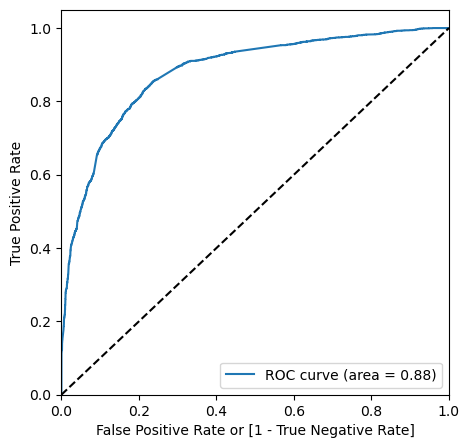

In [78]:
# Using the funvtion to create ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [79]:
# Let us create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187651,0,1,1,0,0,0,0,0,0,0,0
1,0,0.595771,1,1,1,1,1,1,1,0,0,0,0
2,0,0.136083,0,1,1,0,0,0,0,0,0,0,0
3,1,0.881611,1,1,1,1,1,1,1,1,1,1,0
4,1,0.601934,1,1,1,1,1,1,1,1,0,0,0


In [80]:
# Let us check accuracy, sensitivity, and specificity
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.562746  0.972200  0.306274
0.2   0.2  0.762400  0.908831  0.670679
0.3   0.3  0.800031  0.842600  0.773367
0.4   0.4  0.810738  0.767375  0.837900
0.5   0.5  0.812943  0.695830  0.886300
0.6   0.6  0.793261  0.583810  0.924456
0.7   0.7  0.780350  0.513900  0.947247
0.8   0.8  0.759093  0.420278  0.971319
0.9   0.9  0.715793  0.280049  0.988732


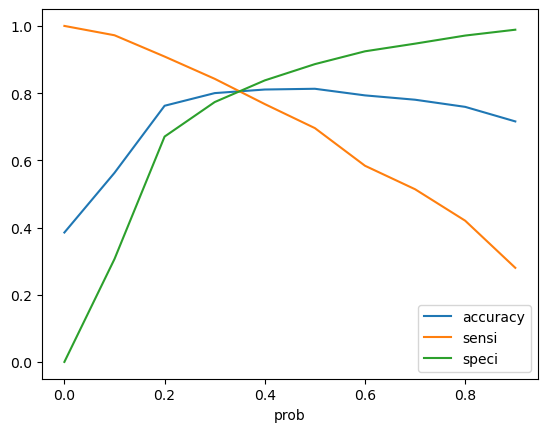

In [81]:
# Let us plot this
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose 0.38 as our cutoff.

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187651,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.595771,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.136083,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.881611,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.601934,1,1,1,1,1,1,1,1,0,0,0,1


In [83]:
# Let's check 'Accuracy'
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8072744449692961

In [84]:
# Let's recreate the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3218,  687],
       [ 537, 1909]], dtype=int64)

In [85]:
# Let's evaluate the other metrics too

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Calculating 'Sensitivity'

TP/(TP+FN)

0.7804578904333606

In [87]:
# Calculating 'Specificity'

TN/(TN+FP)

0.8240717029449424

This cutoff point seems good.

### Making Predictions on Test Dataset:

In [88]:
# Scaling numeric variables
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [89]:
#Adding all the columns in the final train model
col = X_train.columns

In [90]:
# Adding the columns in X_train for X_test as well
X_test = X_test[col]
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0.015936,0.070530,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.019920,0.679695,0,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.007968,0.033243,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.031873,0.073675,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,0,0,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.007968,0.264600,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.031873,0.599730,0,0,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.011952,0.231357,0,0,0,0,0,0,0,0,0,1,0,0


In [91]:
#prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_df.head()

,0
3271,0.129415
1490,0.976115
7936,0.104968
4216,0.755994
3830,0.146077


In [92]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# head
y_pred_final.head()

,Converted,0
0,0,0.129415
1,1,0.976115
2,0,0.104968
3,1,0.755994
4,0,0.146077


In [93]:
# Renaming  the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.129415
1,1,0.976115
2,0,0.104968
3,1,0.755994
4,0,0.146077


In [94]:
# creating prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.129415,0
1,1,0.976115,1
2,0,0.104968,0
3,1,0.755994,1
4,0,0.146077,0


In [95]:
#  Let's Check the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8042600073448403

In [96]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1428,  306],
       [ 227,  762]], dtype=int64)

In [97]:
# Let us evaluate the other metrics too
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
# checking sensitivity
TP/(TP+FN)

0.7704752275025278

In [99]:
# Checking  specificity
TN/(TN+FP)

0.8235294117647058

In [100]:
#  cut off as 0.38, we have accuracy, sensitivity and specificity of more than 77%(almost 80%)

#### Precision and Recall

In [101]:
# looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3461,  444],
       [ 744, 1702]], dtype=int64)

In [102]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7931034482758621

In [103]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.695829926410466

In [104]:
#cut off as 0.35 , Precision  and Recall are around 80% and 70% .

#### Precision and Recall trade off

In [105]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

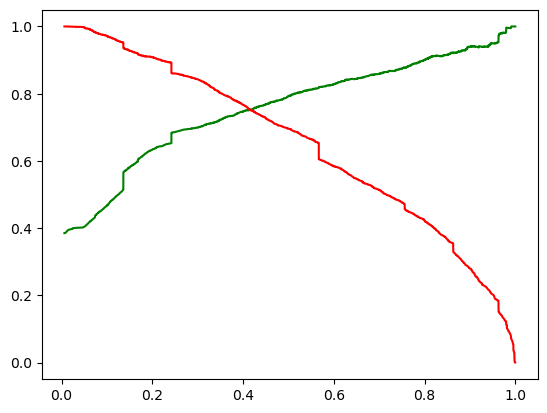

In [106]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
# Fom the above plot we can choose 0.44 as our cutoff.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187651,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.595771,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.136083,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.881611,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.601934,1,1,1,1,1,1,1,1,0,0,0,1


In [108]:
# Calculating Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.810108644307983

In [109]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3350,  555],
       [ 651, 1795]], dtype=int64)

In [110]:
# Let us evaluate the other metrics too
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7638297872340426

In [112]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7338511856091579

In [113]:
# cut off as 0.44 , Precision  and Recall are around 76% and 73% .

#### Making Predictions on Test set

In [114]:
#prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming  the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.129415
1,1,0.976115
2,0,0.104968
3,1,0.755994
4,0,0.146077


In [115]:
# creating prediction using cut off 0.44
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.129415,0
1,1,0.976115,1
2,0,0.104968,0
3,1,0.755994,1
4,0,0.146077,0
...,...,...,...
2718,0,0.225516,0
2719,0,0.145678,0
2720,1,0.891093,1
2721,0,0.130929,0


In [116]:
# let's Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8090341535071612

In [117]:
# confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1484,  250],
       [ 270,  719]], dtype=int64)

In [118]:
# Let us evaluate the other metrics too
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7420020639834881

In [120]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7269969666329625

In [121]:
# cut off as 0.44 , Precision  and Recall are around 74% and 73% .

#### Conclusion/Summary